In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

https://www.kaggle.com/code/sharanharsoor/ctr-analysis-of-different-ml-models#conclusion


In [19]:
data = pd.read_csv("train.csv", chunksize=10 ** 7)

In [21]:
chunk_size = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train, chunk.sample(frac=0.01)], axis=0, ignore_index=True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.


In [23]:
train = train.drop(columns=['id', 'site_id', 'site_domain', 'app_id',
                            'app_domain', 'device_id', 'device_ip', 'device_model'])

In [24]:
train['hour'] = pd.to_datetime(train['hour'], format='%y%m%d%H')

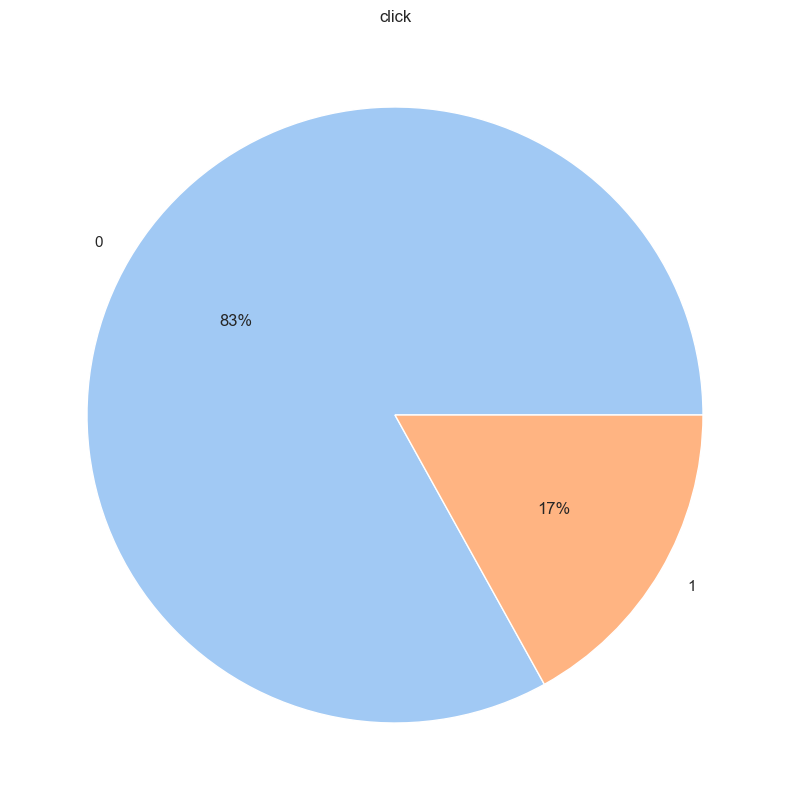

In [26]:
sns.set(rc={'figure.figsize': (10, 10)})
labels = sorted(train['click'].unique())
dt = np.array([len(train[train['click'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title('click')
plt.show()

<Axes: xlabel='hour', ylabel='click'>

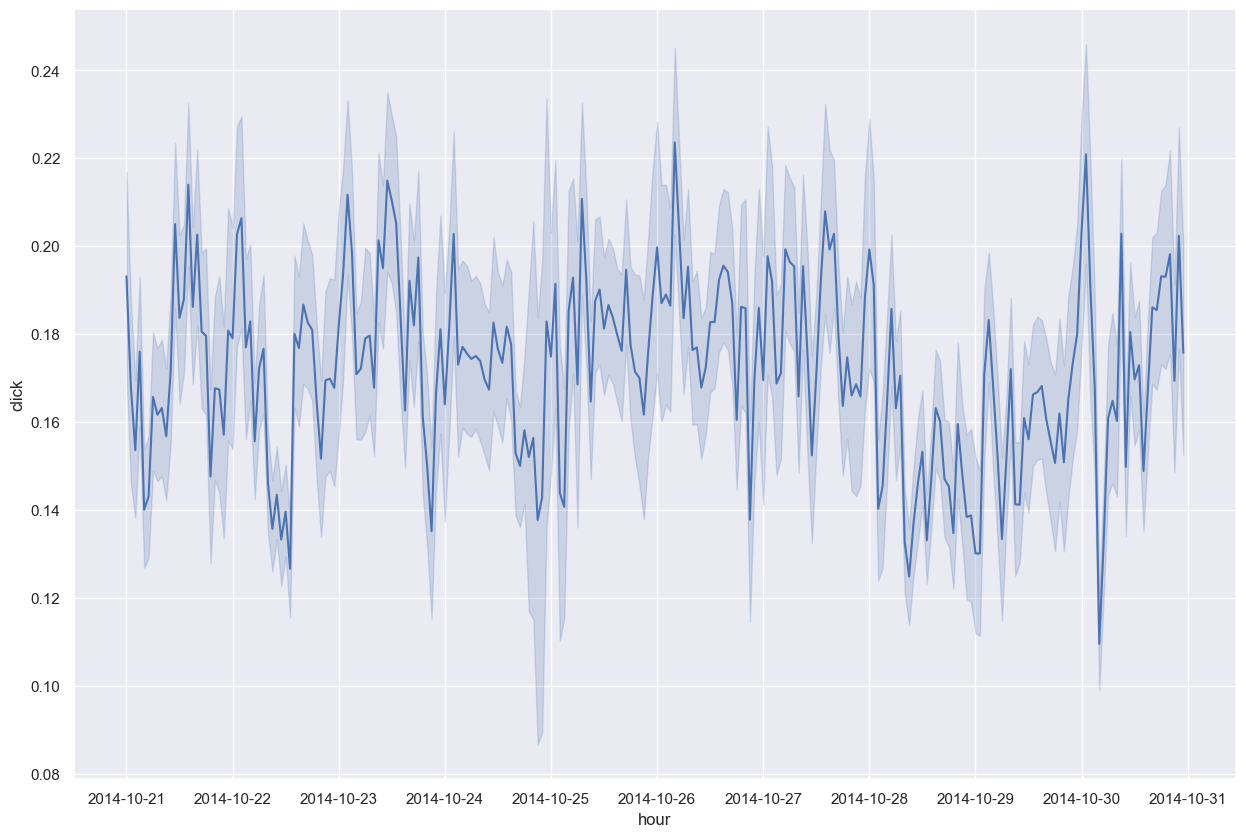

In [27]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour', y='click')

In [30]:
train.head()

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,2014-10-21 02:00:00,1005,0,50e219e0,cef3e649,1,3,21647,320,50,2487,1,547,100170,51
1,0,2014-10-23 01:00:00,1005,0,3e814130,07d7df22,1,0,20366,320,50,2333,0,39,-1,157
2,0,2014-10-21 09:00:00,1005,1,f028772b,07d7df22,1,0,16208,320,50,1800,3,167,100074,23
3,0,2014-10-21 06:00:00,1005,0,f028772b,07d7df22,1,0,21688,320,50,2496,3,167,-1,23
4,1,2014-10-22 13:00:00,1005,0,3e814130,07d7df22,1,2,21836,300,250,2523,0,35,-1,221


In [48]:
model = CatBoostClassifier()

In [32]:
cat_columns = ["site_category", "app_category"]

In [33]:
target = "click"

In [35]:
label_encoder = LabelEncoder()

In [39]:
label_encoder2 = LabelEncoder()

In [37]:
train[cat_columns[0]] = label_encoder.fit_transform(train[cat_columns[0]])

In [40]:
train[cat_columns[1]] = label_encoder2.fit_transform(train[cat_columns[1]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(["hour", target], axis=1), train[target], stratify=train[target])

In [54]:
model.fit(X_train, y_train)

Learning rate set to 0.118207
0:	learn: 0.6271961	total: 37ms	remaining: 36.9s
1:	learn: 0.5780492	total: 60.5ms	remaining: 30.2s
2:	learn: 0.5418289	total: 79.4ms	remaining: 26.4s
3:	learn: 0.5141011	total: 97ms	remaining: 24.2s
4:	learn: 0.4942123	total: 116ms	remaining: 23s
5:	learn: 0.4786308	total: 133ms	remaining: 22s
6:	learn: 0.4666508	total: 151ms	remaining: 21.4s
7:	learn: 0.4578723	total: 169ms	remaining: 21s
8:	learn: 0.4506109	total: 188ms	remaining: 20.7s
9:	learn: 0.4455253	total: 206ms	remaining: 20.4s
10:	learn: 0.4417144	total: 224ms	remaining: 20.1s
11:	learn: 0.4382835	total: 243ms	remaining: 20s
12:	learn: 0.4355134	total: 261ms	remaining: 19.8s
13:	learn: 0.4329262	total: 280ms	remaining: 19.7s
14:	learn: 0.4311076	total: 298ms	remaining: 19.6s
15:	learn: 0.4295573	total: 317ms	remaining: 19.5s
16:	learn: 0.4283124	total: 337ms	remaining: 19.5s
17:	learn: 0.4272532	total: 356ms	remaining: 19.4s
18:	learn: 0.4264081	total: 384ms	remaining: 19.8s
19:	learn: 0.425578

In [56]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     83951
           1       0.60      0.06      0.10     17122

    accuracy                           0.83    101073
   macro avg       0.72      0.52      0.51    101073
weighted avg       0.80      0.83      0.77    101073



/var/folders/64/q9vthv094_591jd1jlz91_x00000gn/T/ipykernel_64932/1709602597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


<Axes: >

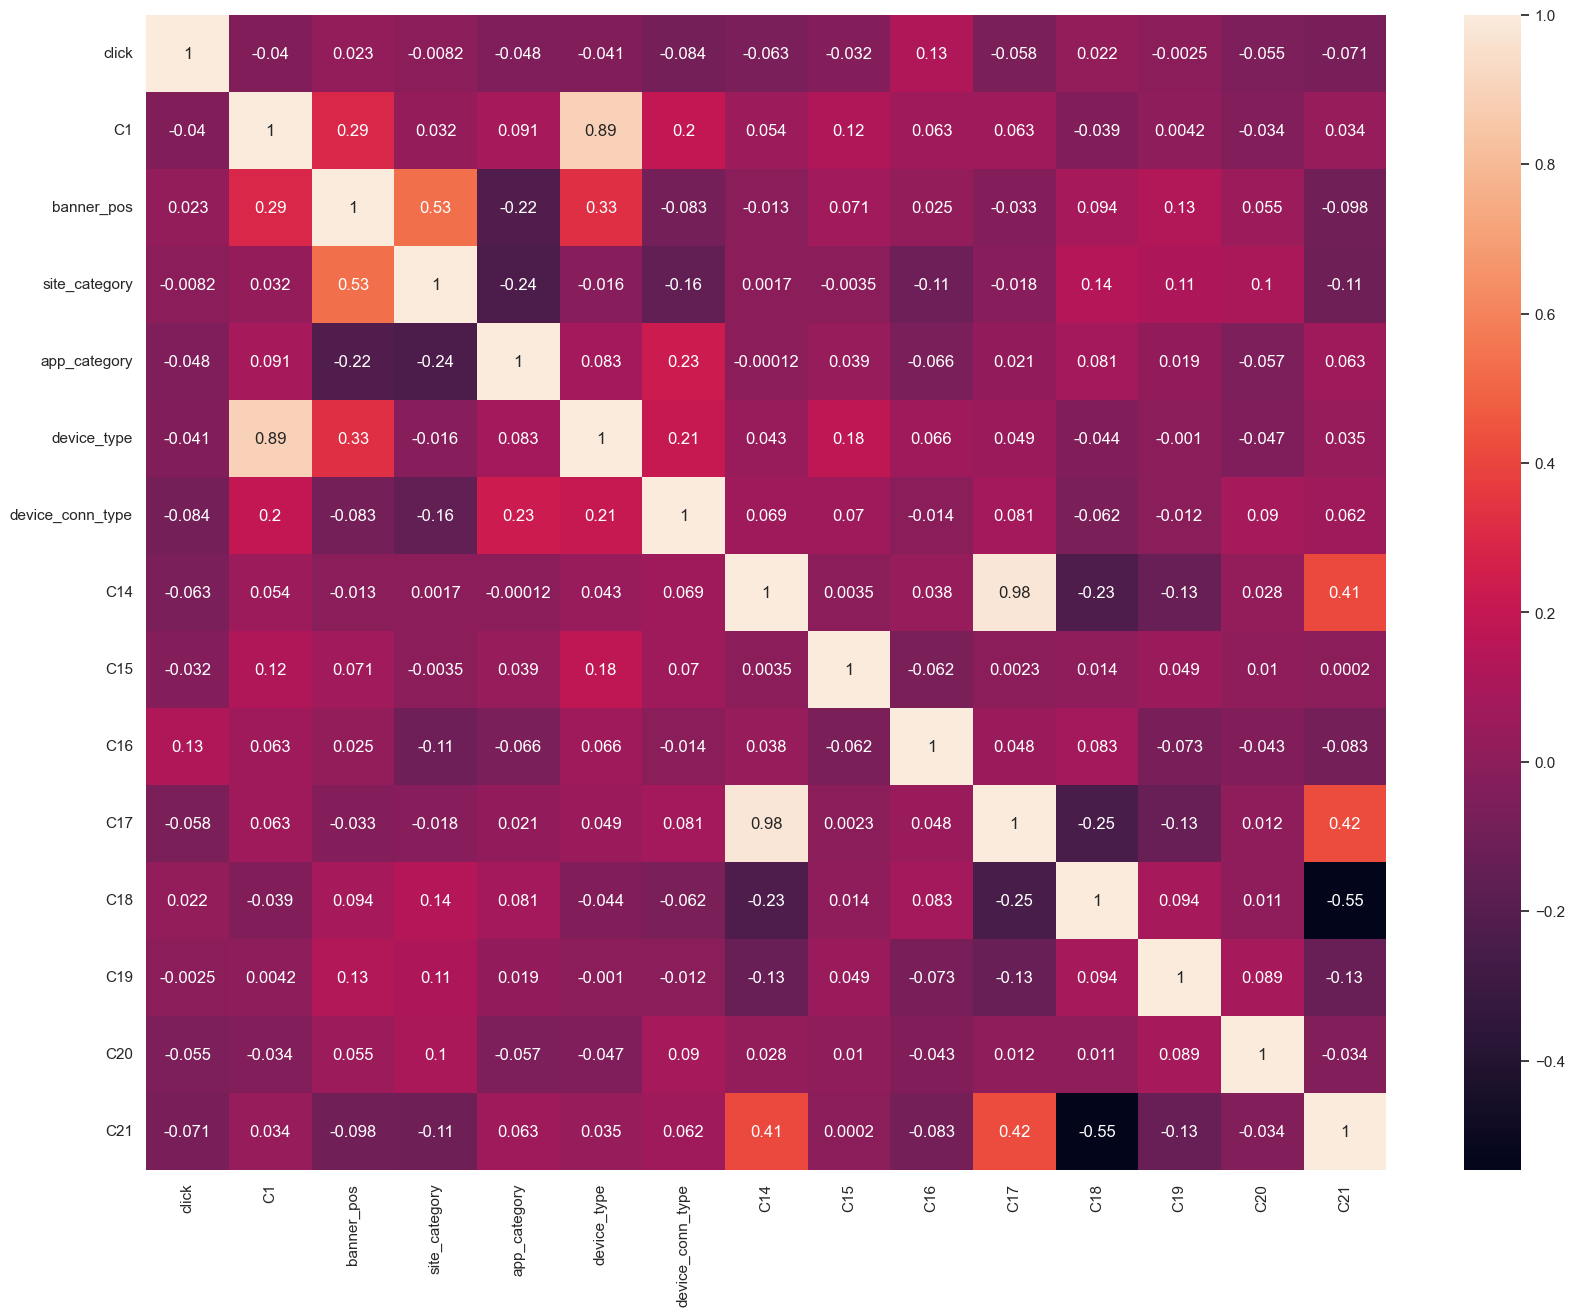

In [57]:
corr_matrix = train.corr()

sns.set(rc={'figure.figsize': (20, 15)})

sns.heatmap(corr_matrix, annot=True)

In [69]:
train = train.drop("hour", axis=1)

In [61]:
scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(columns=['click', "hour"]), train['click'])

StandardScaler()

In [64]:
df_scaled = scaled.transform(train.drop(columns=['click', "hour"]))

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=8)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.18427738 0.15705462 0.12383733 0.08717321 0.08275239 0.07066473
 0.06595523 0.06268702]


In [67]:
zzz = pca.transform(df_scaled)

In [70]:
pd.DataFrame(pca.components_, columns=train.columns[1:])

,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-0.147302,0.082755,0.134253,-0.075422,-0.146011,-0.149033,-0.524596,-0.026066,-0.009591,-0.532833,0.348309,0.163271,0.021680,-0.442585
1,0.584221,0.424379,0.204519,-0.001899,0.592900,0.139141,-0.043375,0.182096,0.045547,-0.045443,0.084028,0.099510,0.017253,-0.097088
2,0.169896,-0.415781,-0.543386,0.453912,0.185846,0.345599,-0.242964,0.081214,0.034948,-0.221326,0.012847,-0.076941,-0.141889,-0.030479
3,0.094951,-0.005049,-0.132726,-0.196035,0.090275,-0.259645,0.053542,-0.265905,0.627034,0.057023,0.165223,-0.410351,-0.412492,-0.153350
4,-0.086178,-0.042181,0.033424,0.277619,-0.101502,0.258768,0.331742,0.013724,0.249992,0.325291,0.557513,0.150732,0.316030,-0.351246
5,-0.065955,0.014689,0.085258,0.258675,-0.042098,-0.287022,0.141289,0.463923,-0.294347,0.142825,0.254608,0.068400,-0.650315,-0.049595
6,-0.097045,-0.082855,-0.168421,-0.349738,-0.028661,-0.030147,-0.024552,0.805999,0.266403,-0.031682,-0.062811,-0.183317,0.263625,-0.045220
7,0.002061,-0.032816,-0.215116,-0.051641,0.010498,-0.181299,0.012670,0.013754,0.400744,0.029532,-0.178620,0.836147,-0.122011,0.096154


In [71]:
pd.Series(pca.noise_variance_, train.columns[1:])

C1                  0.386396
banner_pos          0.386396
site_category       0.386396
app_category        0.386396
device_type         0.386396
device_conn_type    0.386396
C14                 0.386396
C15                 0.386396
C16                 0.386396
C17                 0.386396
C18                 0.386396
C19                 0.386396
C20                 0.386396
C21                 0.386396
dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(zzz, Y, test_size=0.1, random_state=42)

In [109]:
from sklearn.linear_model import SGDClassifier

In [110]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=35,
    shuffle=True,
    max_iter=5500,
    warm_start=True
)

In [111]:
sgd.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

SGDClassifier(loss='log_loss', max_iter=5500, n_iter_no_change=35,
              warm_start=True)

In [112]:
from sklearn.metrics import log_loss

preds_val = sgd.predict_proba(X_valid)

In [113]:
preds_val = np.array(list(map(lambda x: x[1], preds_val)))

In [114]:
preds_val

array([0.11748253, 0.26188738, 0.07632509, ..., 0.17516737, 0.1965457 ,
       0.07608847])

In [115]:
log_loss(y_pred=preds_val, y_true=Y_valid)

0.44939752746319483

In [116]:
print(classification_report(Y_valid, sgd.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     33757
           1       0.37      0.06      0.10      6672

    accuracy                           0.83     40429
   macro avg       0.60      0.52      0.50     40429
weighted avg       0.76      0.83      0.77     40429



In [127]:
model = CatBoostClassifier()

In [128]:
model.fit(X_train, Y_train, verbose=100)

Learning rate set to 0.127777
0:	learn: 0.6242393	total: 130ms	remaining: 2m 9s
100:	learn: 0.4187500	total: 4.58s	remaining: 40.7s
200:	learn: 0.4145344	total: 8.88s	remaining: 35.3s
300:	learn: 0.4123757	total: 13.8s	remaining: 31.9s
400:	learn: 0.4108271	total: 16.6s	remaining: 24.8s
500:	learn: 0.4096106	total: 20.3s	remaining: 20.2s
600:	learn: 0.4086847	total: 25s	remaining: 16.6s
700:	learn: 0.4078267	total: 30.1s	remaining: 12.8s
800:	learn: 0.4070971	total: 35.5s	remaining: 8.83s
900:	learn: 0.4065108	total: 43.3s	remaining: 4.76s
999:	learn: 0.4059716	total: 47.8s	remaining: 0us


In [129]:
print(classification_report(Y_valid, model.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     33757
           1       0.52      0.04      0.08      6672

    accuracy                           0.84     40429
   macro avg       0.68      0.52      0.50     40429
weighted avg       0.79      0.84      0.77     40429



In [130]:
def draw_roc(model, Xtest, actual):
    probs = model.predict(Xtest)
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

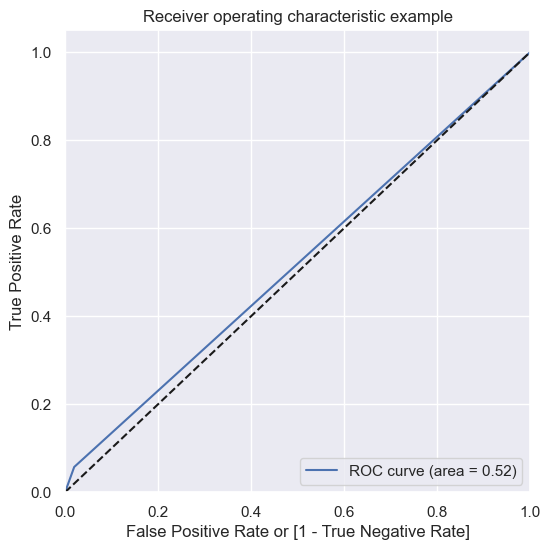

(array([0.        , 0.01952188, 1.        ]),
 array([0.       , 0.0572542, 1.       ]),
 array([2, 1, 0]))

In [132]:
draw_roc(sgd, X_valid, Y_valid)

In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [146]:
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(scaler.fit_transform(train.drop(target, axis=1)), Y, test_size=0.1, random_state=42)

In [147]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix


def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, cnf_matrix

0.8309876573746569
[[33122   635]
 [ 6198   474]]


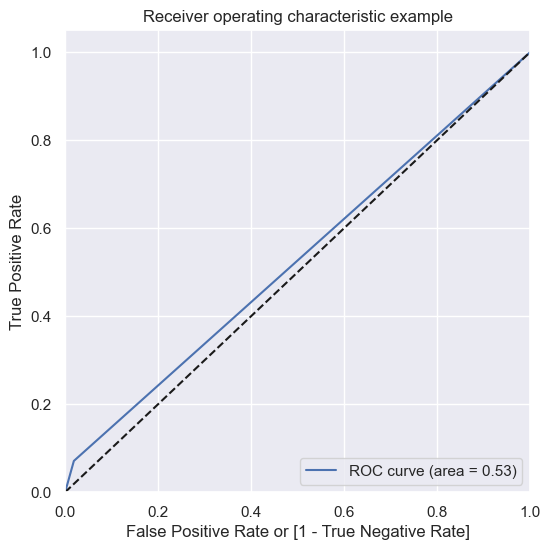

(array([0.        , 0.01881091, 1.        ]),
 array([0.        , 0.07104317, 1.        ]),
 array([2, 1, 0]))

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, Y_train)
y_preds = dt_basic.predict(X_valid)
accuracy, cnf_matrix = model_eval(dt_basic, X_valid, Y_valid)
print(accuracy)
print(cnf_matrix)

draw_roc(dt_basic, X_valid, Y_valid)

In [150]:

randomsample = RandomOverSampler()
x_new, y_new = randomsample.fit_resample(zzz, Y)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.1, random_state=42, stratify=y_new)

0.6838790369410819
[[19992 13589]
 [ 7642 25938]]


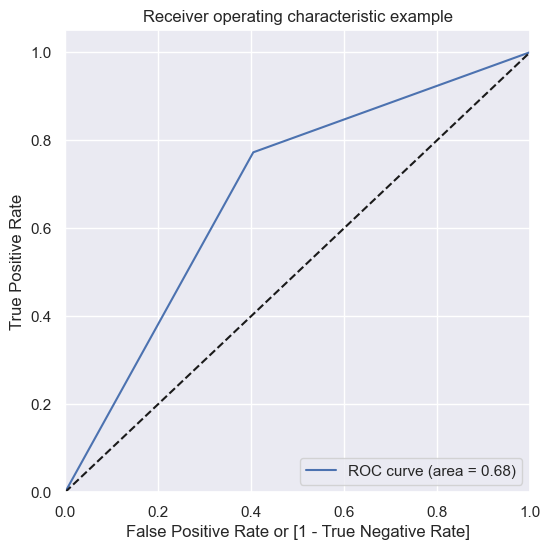

(array([0.        , 0.40466335, 1.        ]),
 array([0.        , 0.77242406, 1.        ]),
 array([2, 1, 0]))

In [163]:
from sklearn.ensemble import RandomForestClassifier

dt_basic = RandomForestClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)

draw_roc(dt_basic, X_test, y_test)

In [180]:
X = train.drop(['click'], axis=1)
y = train.click

In [181]:
import category_encoders as ce

In [182]:
target_encoder = ce.TargetEncoder()
X.drop(['C14', 'C1'], axis=1, inplace= True)

In [183]:
X.head()

,banner_pos,site_category,app_category,device_type,device_conn_type,C15,C16,C17,C18,C19,C20,C21
0,0,5,21,1,3,320,50,2487,1,547,100170,51
1,0,3,0,1,0,320,50,2333,0,39,-1,157
2,1,19,0,1,0,320,50,1800,3,167,100074,23
3,0,19,0,1,0,320,50,2496,3,167,-1,23
4,0,3,0,1,2,300,250,2523,0,35,-1,221


In [184]:
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape  Counter({0: 335801, 1: 68489})
Resampled dataset shape Counter({1: 335801, 0: 335801})


In [185]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [186]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,banner_pos,site_category,app_category,device_type,device_conn_type,C15,C16,C17,C18,C19,C20,C21
73862,0.000000,0.25,0.12,0.2,0.0,0.221239,0.02988,0.813611,1.0,0.218162,0.997526,0.236220
257508,0.142857,0.25,0.12,0.2,0.0,0.221239,0.02988,0.717202,0.0,0.289037,0.999850,0.397638
609706,0.142857,0.95,0.00,0.2,0.0,0.221239,0.02988,0.912665,0.0,0.001107,0.000000,0.866142
141286,0.000000,0.05,0.00,0.2,0.0,0.221239,0.02988,0.608696,0.0,0.001107,0.998364,0.307087
170191,0.000000,0.15,0.00,0.2,0.0,0.221239,0.02988,0.703592,1.0,0.003322,0.000000,0.086614


In [187]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
11,C21,0.172456
10,C20,0.166288
7,C17,0.144887
2,app_category,0.140043
1,site_category,0.086471
6,C16,0.072329
9,C19,0.056956
8,C18,0.050506
0,banner_pos,0.048794
4,device_conn_type,0.038068


In [188]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [189]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

['banner_pos', 'site_category', 'app_category', 'device_conn_type', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
10
Train results
accuracy 0.6775489714350136
cnf_matrix 
 [[138515  96545]
 [ 55046 180015]]
Test results
accuracy 0.5181927824459874
cnf_matrix 
 [[83047 17694]
 [79381 21359]]


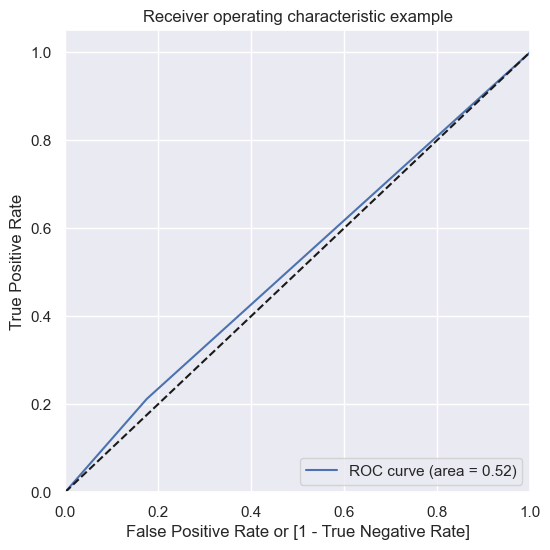

(array([0.        , 0.17563852, 1.        ]),
 array([0.        , 0.21202104, 1.        ]),
 array([2, 1, 0]))

In [190]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dt_tree.predict(X_train)
predict_rf_test = dt_tree.predict(X_test)

accuracy, cnf_matrix = model_eval(dt_tree, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dt_tree, X_test, y_test)